### Importing libraries & reading dataset

In [35]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv('Dataset/Listings.csv', encoding='ptcp154')

/Users/tobiasgrassani/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (5,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Cleaning & Analyzing data

#### > <font color='LightSeaGreen'>Let's analyze it</font>

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279539 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

Conclusion: the columns 'district','host_response_time','host_response_rate','host_acceptance_rate' makes the job difficultier, so i decided to pop them.


#### > <font color='LightSeaGreen'>Now let's clean it</font>

##### Clean: Poping few useless columns

In [38]:
df.pop('district')
df.pop('host_response_time')
df.pop('host_response_rate')
df.pop('host_acceptance_rate')

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
279707   NaN
279708   NaN
279709   NaN
279710   NaN
279711   NaN
Name: host_acceptance_rate, Length: 279712, dtype: float64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279539 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_is_superhost            279547 non-null  object 
 6   host_total_listings_count    279547 non-null  float64
 7   host_has_profile_pic         279547 non-null  object 
 8   host_identity_verified       279547 non-null  object 
 9   neighbourhood                279712 non-null  object 
 10  city                         279712 non-null  object 
 11  latitude                     279712 non-null  float64
 12  longitude                    279712 non-null  float64
 13 

Conclusion: After poping the columns, i proceed to clean NaN-value rows. 

##### Clean: Droping all NaN rows left

In [40]:
df = df.dropna()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167686 entries, 0 to 279711
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   167686 non-null  int64  
 1   name                         167686 non-null  object 
 2   host_id                      167686 non-null  int64  
 3   host_since                   167686 non-null  object 
 4   host_location                167686 non-null  object 
 5   host_is_superhost            167686 non-null  object 
 6   host_total_listings_count    167686 non-null  float64
 7   host_has_profile_pic         167686 non-null  object 
 8   host_identity_verified       167686 non-null  object 
 9   neighbourhood                167686 non-null  object 
 10  city                         167686 non-null  object 
 11  latitude                     167686 non-null  float64
 12  longitude                    167686 non-null  float64
 13 

Now we have a clean dataset.

### Creating Masks

#### > <font color='LightSeaGreen'>New York</font>

In [91]:
df_NY = df['city'] == 'New York'
df_NY = df[df_NY]

In [92]:
prices_NY = df_NY['price']
overallRating_NY = df_NY['review_scores_rating']
accommodates_NY = df_NY['accommodates']
bedrooms_NY = df_NY['bedrooms']

#### > <font color='LightSeaGreen'>Paris</font>

In [93]:
df_PARIS = df['city'] == 'Paris'
df_PARIS = df[df_PARIS]

In [94]:
prices_PARIS = df_PARIS['price']
overallRating_PARIS = df_PARIS['review_scores_rating']
accommodates_PARIS = df_PARIS['accommodates']
bedrooms_PARIS = df_PARIS['bedrooms']

### Exploring data

#### > <font color='LightSeaGreen'>Correlations</font>

In [42]:
df.corr()

,listing_id,host_id,host_total_listings_count,latitude,longitude,accommodates,bedrooms,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
listing_id,1.000000,0.587223,0.051446,-0.037748,-0.009056,-0.001169,-0.009248,0.007549,-0.048265,-0.006363,-0.022801,-0.045348,-0.023362,-0.063269,-0.066096,0.018166,-0.015036
host_id,0.587223,1.000000,-0.019838,-0.019959,0.002637,-0.007074,-0.010197,0.004816,-0.039450,-0.003334,-0.086744,-0.094308,-0.053687,-0.099579,-0.104688,-0.046445,-0.064309
host_total_listings_count,0.051446,-0.019838,1.000000,0.011605,0.005900,0.032436,0.018035,0.011227,0.003375,-0.000564,-0.041073,-0.040291,-0.021722,-0.039127,-0.047215,-0.005463,-0.053108
latitude,-0.037748,-0.019959,0.011605,1.000000,-0.440523,-0.086123,-0.144224,-0.124322,0.046940,0.001327,-0.028361,-0.005188,-0.024022,-0.021020,-0.010641,-0.047992,-0.013639
longitude,-0.009056,0.002637,0.005900,-0.440523,1.000000,0.037673,0.055652,0.021258,-0.057170,-0.000068,-0.048080,-0.051821,-0.047918,-0.044036,-0.032645,-0.050360,-0.040737
accommodates,-0.001169,-0.007074,0.032436,-0.086123,0.037673,1.000000,0.682422,0.173051,-0.029872,0.006482,-0.001908,-0.013974,-0.001097,0.000960,-0.004269,0.009941,-0.034749
bedrooms,-0.009248,-0.010197,0.018035,-0.144224,0.055652,0.682422,1.000000,0.180015,-0.016607,0.001260,0.009083,-0.010803,0.002211,0.005508,-0.004706,0.008687,-0.019678
price,0.007549,0.004816,0.011227,-0.124322,0.021258,0.173051,0.180015,1.000000,-0.009029,-0.000522,0.013923,-0.001159,0.023083,0.000411,-0.001781,0.002090,-0.000314
minimum_nights,-0.048265,-0.039450,0.003375,0.046940,-0.057170,-0.029872,-0.016607,-0.009029,1.000000,-0.000594,-0.000936,-0.000459,-0.015201,-0.001924,-0.001070,-0.009940,-0.004695
maximum_nights,-0.006363,-0.003334,-0.000564,0.001327,-0.000068,0.006482,0.001260,-0.000522,-0.000594,1.000000,-0.000324,0.000065,-0.000523,0.001345,0.001283,0.001760,-0.001457


Conclusion: 
- ['acommodates'] & ['bedrooms'] are 0.68 correlative
- all of ['review_scores_...'] are above 0.5 of correlation

#### > <font color='LightSeaGreen'>Mean, Median & Mode</font>

In [100]:
df["city"].mode()

0    Paris
dtype: object

In [98]:
df_NY["price"].mean()

135.00841206696504

In [95]:
df_PARIS["price"].mean()

117.33904028279737

In [103]:
df_NY["bedrooms"].mean()

1.3087601524946129

In [104]:
df_PARIS["bedrooms"].mean()

1.3599862822170048

### Plotting

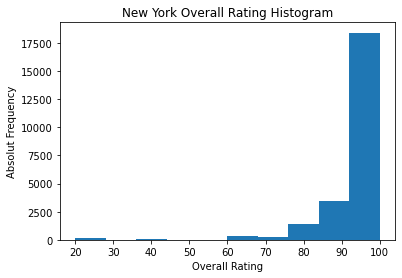

In [117]:
fix, ax = plt.subplots()
ax.hist(overallRating_NY,bins=10)
ax.set_title('New York Overall Rating Histogram')
ax.set_xlabel('Overall Rating')
ax.set_ylabel('Absolut Frequency')
plt.show()

In [ ]:
fix, ax = plt.subplots()
ax.hist(overallRating_NY,bins=10)
ax.set_title('New York Overall Rating Histogram')
ax.set_xlabel('Overall Rating')
ax.set_ylabel('Absolut Frequency')
plt.show()

### Ignore: Code testing

<AxesSubplot:>

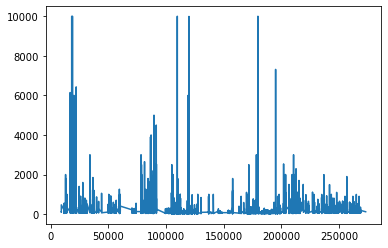

In [114]:
df_NY['price'].plot()

In [120]:
print(df_NY.groupby('bedrooms')['price'].mean().round(1))

bedrooms
1.0      106.1
2.0      200.0
3.0      268.4
4.0      429.2
5.0      587.0
6.0      865.0
7.0     1271.8
8.0      450.2
9.0      714.0
10.0     150.0
11.0      66.0
14.0    1661.0
21.0     201.0
Name: price, dtype: float64


In [128]:
print(df_NY.groupby('accommodates')['city'].count())

accommodates
1      3619
2     10894
3      2432
4      3851
5      1070
6      1301
7       252
8       344
9        47
10      137
11       27
12       65
13       20
14       15
15       10
16       48
Name: city, dtype: int64


In [129]:
print(df_PARIS.groupby('bedrooms')['price'].mean().round(1))

bedrooms
1.0       89.8
2.0      160.6
3.0      243.0
4.0      393.0
5.0      534.8
6.0     1039.4
7.0      666.7
9.0      460.0
12.0     999.0
23.0     120.0
50.0      49.0
Name: price, dtype: float64


In [130]:
print(df_PARIS.groupby('accommodates')['city'].count())

accommodates
1      1646
2     15906
3      3748
4     10868
5      1836
6      2606
7       362
8       553
9        66
10      147
11       29
12       62
13       17
14       23
15       17
16       21
Name: city, dtype: int64


In [132]:
df_NY['city'].count()

24132

In [133]:
df_PARIS['city'].count()

37907

In [134]:
df['city'].count()

167686

In [143]:
df_NY[['bedrooms','price']].describe().round()

,bedrooms,price
count,24132.0,24132.0
mean,1.0,135.0
std,1.0,252.0
min,1.0,10.0
25%,1.0,60.0
50%,1.0,96.0
75%,1.0,150.0
max,21.0,10000.0
